In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [2]:
data = pd.read_csv('mnist_train.csv').to_numpy()
labels = data[:,0]
data = data[:,1:]
mean = np.mean(data,axis=0)
data = data - mean

In [12]:
def display(data, labels, title):
    for i in range(10):
        d = data[labels==i]
        plt.scatter(d[:,0],d[:,1],s=2)
        plt.subplots_adjust(top=3, right=3)
        plt.title(title, fontsize=25)

In [4]:
def calc_del(X,C): 
    F = X @ C @ C.T
    P = F - X
    T1 = X.T @ P @ C
    T2 = P.T @ X @ C
    scale = np.linalg.norm(F)
    J = (T1 + T2)/ scale
    return J

In [5]:
def grd(data,alpha,bs,iters):
    w = np.random.rand(28 * 28, 28 * 28)
    C,_ = np.linalg.qr(w)
    for i in range(iters):
        mask = np.random.choice([False, True], 60000, p=[1-bs, bs])
        dell = calc_del(data[mask], C)
        C = C - alpha * dell
    return C    

In [6]:
alpha = 0.000005
bs = 0.1
iters = 150
basis = grd(data, alpha, bs, iters)

(60000, 784)


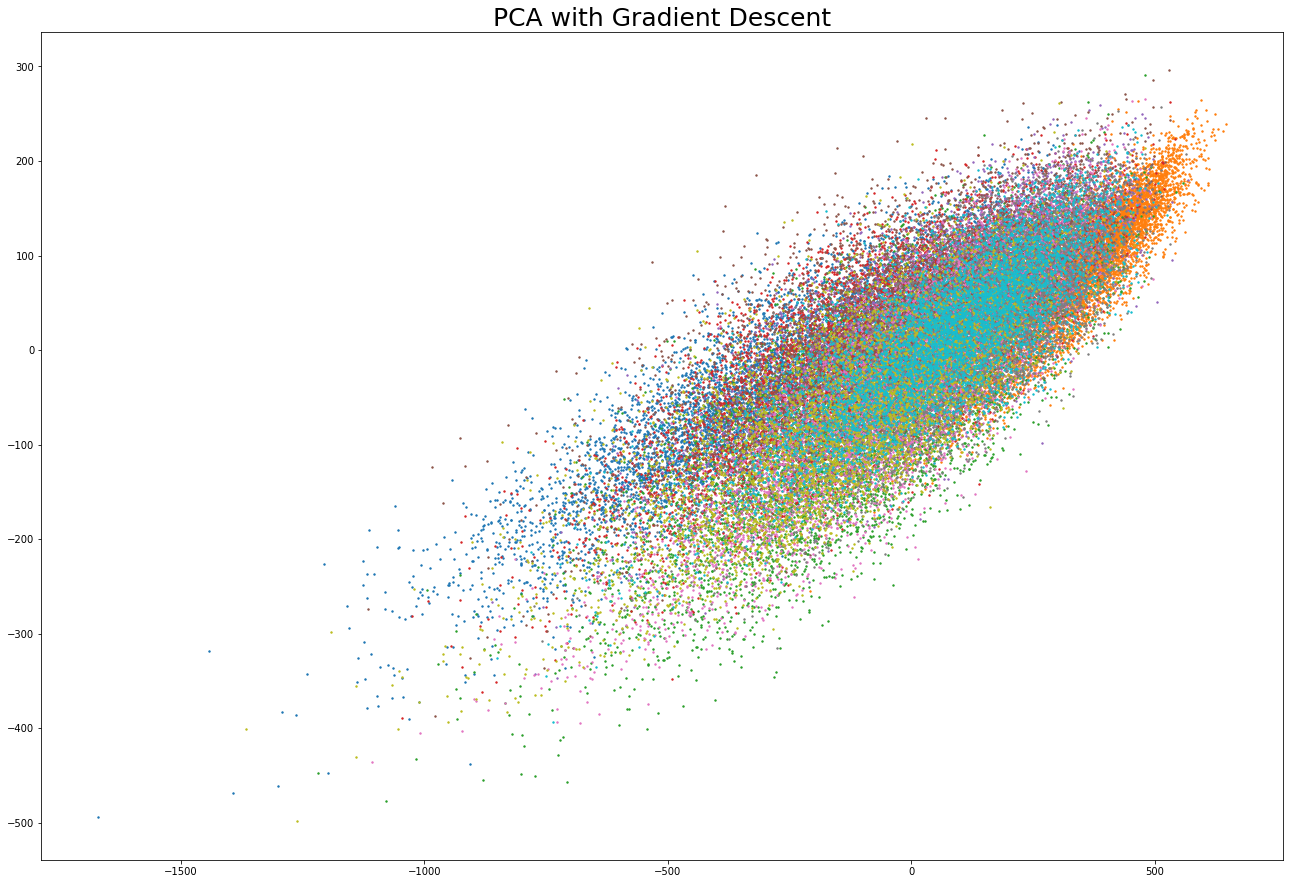

In [13]:
projected = data @ basis[:, :2]
reconstructed = projected @ basis[:, :2].T
print(reconstructed.shape)
display(projected,labels, "PCA with Gradient Descent")

In [1]:
C = np.cov(data.T)
(V, D) = np.linalg.eigh(C)
V = V[::-1]
D = D.T[::-1].T
P = D[:, :2]
proj = data @ P
display(proj, labels, "PCA with Direct EigenVectors")

NameError: name 'np' is not defined